## Supervised Learning Potpourri
# 2 - Airline Arrivals
### Sam Fradkin

Use [this dataset](http://stat-computing.org/dataexpo/2009/the-data.html) of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Airline Arrivals 2008.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [12]:
df.shape

(7009728, 29)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0


In [4]:
# Remove all flights that were cancelled as they have no value in predicting delay times
df = df[df['Cancelled'] == 0]

In [5]:
# Remove all columns that add no value to delay predictions
df.drop(['Year', 'FlightNum', 'Cancelled', 'CancellationCode', 'TailNum'], 1, inplace=True)

In [6]:
# From the DESCRIBE print, it appears that the last five features are missing about 80% of their data.
# Let's remove those features too.
df.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 1, inplace=True)

In [7]:
# Let's create a new boolean feature that indicates if a flight was delayed (>30 minutes late).
df['Delayed'] = np.where(df['ArrDelay'] > 30, 1, 0)

In [8]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,Delayed
0,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,0
1,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,0
2,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,0
3,1,3,4,926.0,930,1054.0,1100,WN,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,0
4,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,1


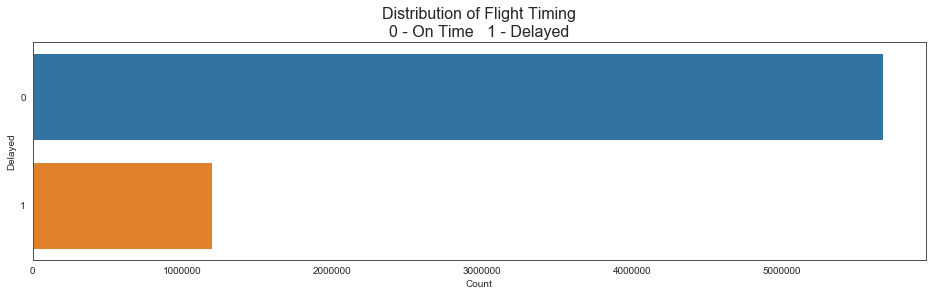

In [17]:
plt.figure(figsize=(16, 4))
sns.countplot(y = 'Delayed', data = df)
plt.xlabel('Count')
plt.title('Distribution of Flight Timing\n0 - On Time   1 - Delayed', fontsize = 16)
plt.show()

These numbers cannot be accurate. Taking a closer look at the data, it appears that the time values that are provided as integers and floats are actually clock times, and therefore cannot use basic arithmetic calculations. We must convert the data to types that can be tabulated accurately.

In [9]:
# Convert all relevant columns into arithmetic-ready number types
df['DepTime'   ] = df['DepTime'   ].apply(lambda x: round(np.floor_divide(x, 100) + (np.remainder(x, 100) / 60), 2))
df['CRSDepTime'] = df['CRSDepTime'].apply(lambda x: round(np.floor_divide(x, 100) + (np.remainder(x, 100) / 60), 2))
df['ArrTime'   ] = df['ArrTime'   ].apply(lambda x: round(np.floor_divide(x, 100) + (np.remainder(x, 100) / 60), 2))
df['CRSArrTime'] = df['CRSArrTime'].apply(lambda x: round(np.floor_divide(x, 100) + (np.remainder(x, 100) / 60), 2))

In [10]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,Delayed
0,1,3,4,20.05,19.92,22.18,22.42,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,0
1,1,3,4,7.90,7.58,10.03,10.00,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,0
2,1,3,4,6.47,6.33,8.07,7.83,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,0
3,1,3,4,9.43,9.50,10.90,11.00,WN,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,0
4,1,3,4,18.48,17.92,19.98,19.42,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,1


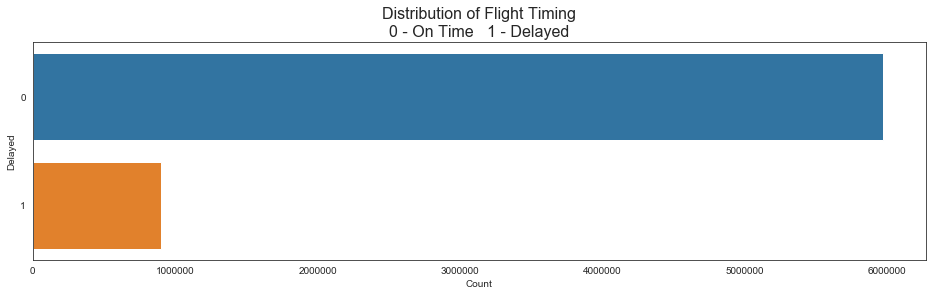

In [33]:
plt.figure(figsize=(16, 4))
sns.countplot(y = 'Delayed', data = df)
plt.xlabel('Count')
plt.title('Distribution of Flight Timing\n0 - On Time   1 - Delayed', fontsize = 16)
plt.show()

In [11]:
totalflights = len(df.Delayed)
delayed    = df['Delayed'].value_counts()[1]
ontime     = df['Delayed'].value_counts()[0]
delayedpct = delayed / totalflights
ontimepct  = ontime  / totalflights

print('--- Flight Status Counts ---')
print()
print('Total Flights: ', str(totalflights))
print('On Time:       ', str(ontime),   '  (', str(round((ontimepct  * 100), 2)), '%)')
print('Delayed:        ', str(delayed), '  (', str(round((delayedpct * 100), 2)), '%)')

--- Flight Status Counts ---

Total Flights:  6872294
On Time:        5970896   ( 86.88 %)
Delayed:         901398   ( 13.12 %)


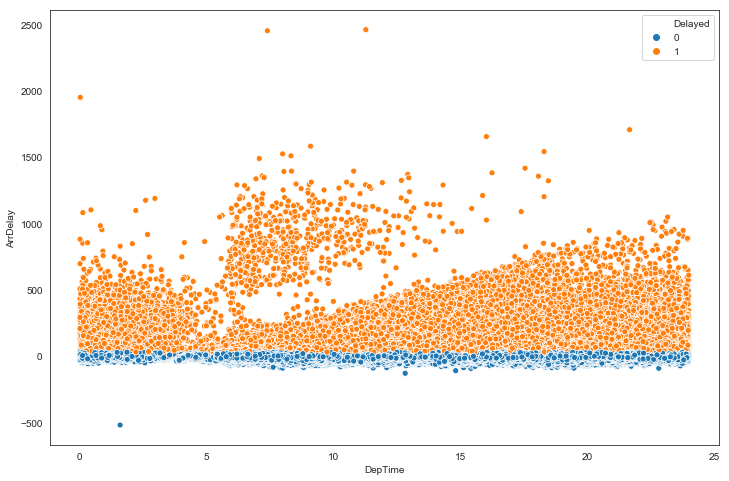

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'DepTime', y = 'ArrDelay', hue = 'Delayed', data = df)
plt.xlabel('Departure Time')
plt.ylabel('Arrival Delay (in minutes)')
plt.xticks(ticks = [0, 3, 6, 9, 12, 15, 18, 21, 24])
plt.show()

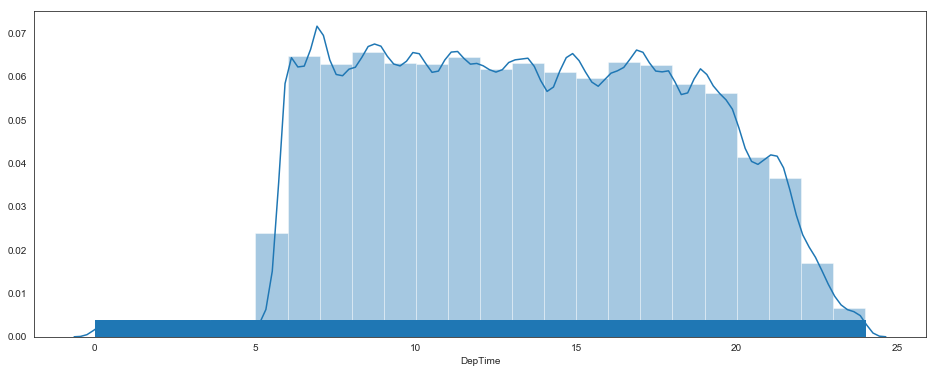

In [16]:
departurecolumn = df['DepTime']

plt.figure(figsize=(16,6))
sns.distplot(departurecolumn, bins = 24, rug = True)
plt.title('Departure Time Distribution')
plt.xlabel('Departure Time')
plt.xticks(ticks = [0, 3, 6, 9, 12, 15, 18, 21, 24])
plt.show()

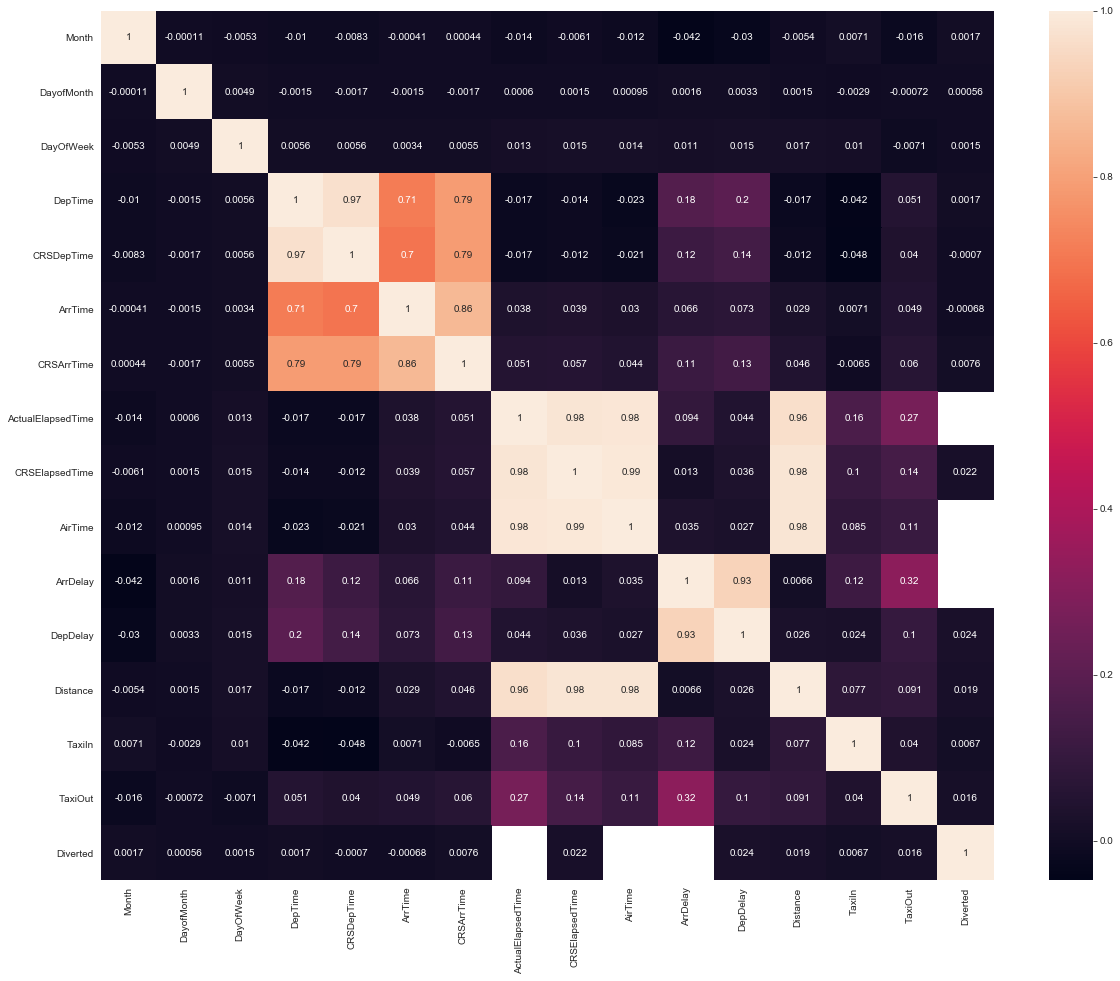

In [12]:
# Create a heatmap of feature correlations
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True)
plt.show()